# Estadística y Probabilidades: Introducción

# Objetivos clase de hoy

- Activar nociones sobre los conocimientos previos de EyP
- Definir algunos conceptos fundamentales de la EyP
- Comprender la motivación detrás del estudio de EyP para ingeniería


# Ejercicio interactivo

<center>
    <img src="figures/qr-survey-2023.png" width="400"/>
</center>

https://questionpro.com/t/AVr7rZzMbn

# Ejemplo introductorio (1)

La fabricación de cadenas pesadas consiste en una serie de procesos hasta llegar al producto final.

**Ej.**: preparación materia prima, proceso de doblado, proceso de soldadura, tratamiento térmico, etc.

<center>
    <img src="figures/chains-1.png" width="700"/>
</center>

¿Por qué sería necesario aplicar elementos de EyP en esta aplicación?



## Variabilidad de los datos

Al medir distintas propiedades de eslabones, se obtendrán **resultados no siempre iguales**, a pesar de que el proceso (nominalmente) se mantenga constante.

**Ej.**: densidad, dureza, resistencia tracción, curvatura, etc.

<center>
    <img src="figures/mech-prop.jpg" width="400"/>
</center>

Siempre hay **variabilidad en los procesos**: factor humano, condiciones ambientales, descalibración instrumentos, etc.

## Incertidumbre inherente

No es posible conocer exáctamente cómo miles de **posibles factores** influyen en las propiedades de los eslabones.

<center>
    <img src="figures/question-1.jpg" width="400"/>
</center>

Habría que tener muchos modelos físicos complejos para entender las variaciones que distintos factores producen en los eslabones.

Aquí es donde los modelos matemáticos, y en particular de EyP, ayudan a **comprender mejor** estas variaciones.

# Estadística

Es la **rama de las matemáticas** que estudia la variabilidad, colección, organización, análisis, interpretación y presentación de los datos.

<center>
    <img src="figures/intro-1.png" width="500"/>
</center>

Además, trata con los **procesos aleatorios** que generan esos datos a través de la teoría de probabilidad.

Aplicación para buscar **correlaciones y dependencias** en un fenómeno aleatorio o condicional.



## Estadística descriptiva

Se dedica a describir, visualizar y resumir datos sobre un fenómeno.

## Estadística inferencial

Se dedida a generar modelos, inferencias y predicciones asociadas a un fenómeno considerando la aleatoriedad de las observaciones. 

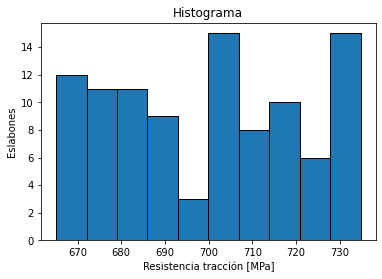

In [3]:
import numpy as np
import matplotlib.pyplot as plt
stress = 700*(1+(np.random.rand(100)-0.5)/10)
plt.hist(stress, edgecolor='black'), plt.xlabel('Resistencia tracción [MPa]')
plt.ylabel('Eslabones'), plt.title('Histograma')
plt.show()

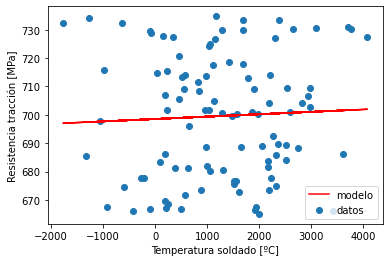

In [7]:
temp = (1+(np.random.randn(100)-0.1)/1)*stress*1300/700
A = np.vstack([temp, np.ones(len(temp))]).T
m, c = np.linalg.lstsq(A, stress, rcond=None)[0]
plt.plot(temp, m*temp + c, color='r', label='modelo')
plt.scatter(temp, stress, label='datos')
plt.xlabel('Temperatura soldado [ºC]'), plt.ylabel('Resistencia tracción [MPa]'), plt.legend()
plt.show()

# Probabilidades

Rama de las matemáticas que estudia **fenómenos aleatorios o estocásticos**

En ellos se obtienen **resultados distintos** al realizar experimentos bajo las mismas condiciones (ej.: tirar un dado). Son contrarios a fenómenos deterministas.

Las probabilidades pueden cuantificar los resultados que puedan surgir de un fenómeno aleatorio.

<center>
    <img src="figures/sponge-1.png" width="300"/>
</center>



In [38]:
import random

def coin_trial(): #simula el lanzamiento de un dado
    return 0 if random.random() <= 0.5 else 1

def simulate(n): #simula el lanzamiento de n dados y calcula el promedio
    trials = [coin_trial() for i in range(n)]
    return print(sum(trials)/n)

simulate(1000000)

0.500347


# Ejemplo introductorio (2)

En la fábrica de cadenas se determina que económicamente solo se puede aceptar un 5% de eslabones defectuosos en el proceso de soldadura. 

El personal realiza una **muestra** de 100 eslabones y encuentra que hay 10 defectuosos. 

<center>
    <img src="figures/chain-3.jpg" width="400"/>
</center>

¿Es esta información **concluyente** para determinar que el proceso no es aceptable?

Con técnicas de inferencia, se puede estimar la probabilidad de obtener 10 eslabones defectuosos en una muestra de 100 unidades.

**Escenario**: si el proceso es aceptable, entonces hay una probabilidad de 0.02 de que esto ocurra.

<center>
    <img src="figures/chains-1.png" width="700"/>
</center>

Por lo tanto, es muy probable que el proceso no sea aceptable, ya que para un proceso aceptable era muy difícil obtener 10 eslabones defectuosos desde una muestra de 100 unidades.



# Inferencia, Muestreo y Diseño Experimental

## Relación entre inferencia estadística y probabilidades

La **muestra** junto con la **inferencia** permiten obtener conclusiones acerca de una **población**.

<center>
    <img src="figures/inference-prob-1.png" width="1000"/>
</center>

Las probabilidades permiten **sacar conclusiones acerca de las muestras** con base en características conocidas de la población.



## Población y muestreo

La muestra es el **subconjunto** de una población que se estudia para obtener información sobre ella.

El proceso de **muestreo** es crucial para obtener información fidedigna y evitar muestras sesgadas

**Ej.:** Muestreo aleatorio VS muestreo aleatorio estratificado:
<center>
    <img src="figures/sampling-1.png" width="800"/>
</center>

## Diseño experimental

El proceso de muestreo también es crucial a la hora de realizar un **diseño experimental**.

Aquí se busca **identificar y cuantificar** las causas de algún efecto dentro de un estudio experimental.

<center>
    <img src="figures/design-1.png" width="600"/>
</center>

La idea es poder establecer un grado de confianza de una presunta relación **causa-efecto**.

# Ejemplo introductorio (3)

Se quiere investigar si un recubrimiento de cromo ayuda a disminuir la corrosión de los eslabones.

Se toma una muestra aleatoria de eslabones y se experimenta con 4 condiciones resultando lo siguiente:

<center>
    <img src="figures/chain-table.png" width="600"/>
</center>

A pesar que los datos permiten concluir sobre los efectos del recubrimiento y de la humedad, no es posible evaluar con exactitud los resultados sin considerar la **variabilidad del promedio**.


**¿Los datos con los que se llegó a cada promedio, estaban cercanos o lejanos entre sí?**
- Ciclos promedio corrosión 1550 viene de valores 1500 y 1600
- Ciclos promedio corrosión 1550 viene de valores 1250 y 1850

**¿La muestra de eslabones permite asegurar la validez del experimento?**
- Todos los eslabones fueron soldados en el mismo turno
- La mitad de los eslabones fueron soldados en el turno día, mientras que los otros fueron soldados en el turno noche

# Reglas del juego y ética

Siempre aplica el reglamento de docencia pregrado de la Universidad y de la Facultad de Ingeniería.

La asistencia a clases y prácticas es voluntaria y no será registrada.

Las evaluaciones ya están fijadas y no serán reagendadas excepto por motivos de fuerza mayor.

Compromisos del docente:
- Atender y responder cualquier duda o consulta de estudiantes en un plazo razonable.
- Realizar evaluaciones conformes al nivel de los contenidos en las clases y prácticas.
- Tratar a estudiantes con respeto procurando una retroalimentación constructiva.

Se espera de estudiantes:
- Tener una actitud de respeto con el docente y compañeros en la sala de clases.
- No realizar acciones ilícitas durante evaluaciones (obtener información externa).

# Sumario

- La estadística estudia principalmente la variabilidad inherente de los datos de algún fenómeno.
- Hay una estadística descriptiva y una inferencial.
- Las probabilidades tratan con los fenómenos aleatorios y estocásticos.
- El muestreo de una población es clave para el análisis estadístico.